In [31]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

In [32]:
os.listdir()

['mundo-95(paraR).csv',
 'myfile3.tsv',
 'BREXIT.csv',
 'indice_marginacion.csv',
 'clinton (etiquetas).xls',
 'myfile2.tsv',
 '.DS_Store',
 'marginacion.ipynb',
 'Regresión Logistica.md',
 'titanic3.xls',
 'winequality-red.csv',
 'clusters.ipynb',
 'myfile4.txt',
 'BREXIT1.xlsx',
 'Datos para Regresion.xlsx',
 'RESPUESTAS150344.html',
 'localidades(urban0-rurales).csv',
 'desaparicion_forzada-2.html',
 'ingreso.ipynb',
 'BREXIT.sav',
 'datos.csv',
 'myfile.tsv',
 'viviendas.csv',
 'Examen 1 Aplicada 3 preguntas.docx',
 'Datos para Regresion.csv',
 '.ipynb_checkpoints',
 'localidades(urban0-rurales).xlsx',
 'desaparicion_forzada.ipynb',
 '.git',
 'Diccionario_mun (1).pdf',
 'examen.ipynb',
 'mi_muestra150344.csv',
 'titanic.ipynb',
 'head.txt',
 'titanic3.csv',
 'Regresión-Logistica.html']

In [33]:
df=pd.read_csv('localidades(urban0-rurales).csv')
df.head()

,consecutivo,folioviv,ic_rezedu,ic_asalud,ic_segsoc,trab,jedad,muj15a49,exc_lengua,depecon,...,ing_rent,ing_tran,rururb,intt,intpc,teneciareg,locurbana,paredsol,techosol,lningtot
0,1,11001,1,0,0,1,48,1,0,0,...,0.00,0.00,0,6733.94,1683.49,1,1,1.0,1.0,8.81
1,2,11002,5,2,2,2,41,0,0,3,...,0.00,0.00,0,10205.37,1457.91,1,1,1.0,1.0,9.23
2,3,11003,1,0,9,1,49,2,0,1,...,0.00,241.53,0,11835.38,1315.04,0,1,1.0,1.0,9.38
3,4,11004,0,1,0,1,52,0,0,1,...,0.00,6008.00,0,9506.56,2376.64,1,1,1.0,1.0,9.16
4,5,11005,2,0,0,1,38,1,0,1,...,0.00,138.98,0,6162.70,1027.12,1,1,1.0,1.0,8.73


df.head()

In [34]:
cols=[]
for i,typex in enumerate(df.dtypes):
    if(typex!='object'):
        cols.append(df.columns[i])

In [17]:
len(cols)

12

# TSNE

X = np.array(df[cols])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape


In [33]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)

In [13]:
from sklearn.cluster import KMeans

In [56]:
kmeans=KMeans(n_clusters=3).fit(X)
labels=kmeans.predict(X)

In [48]:
colores=['lightred','lightgreen','lightblue']

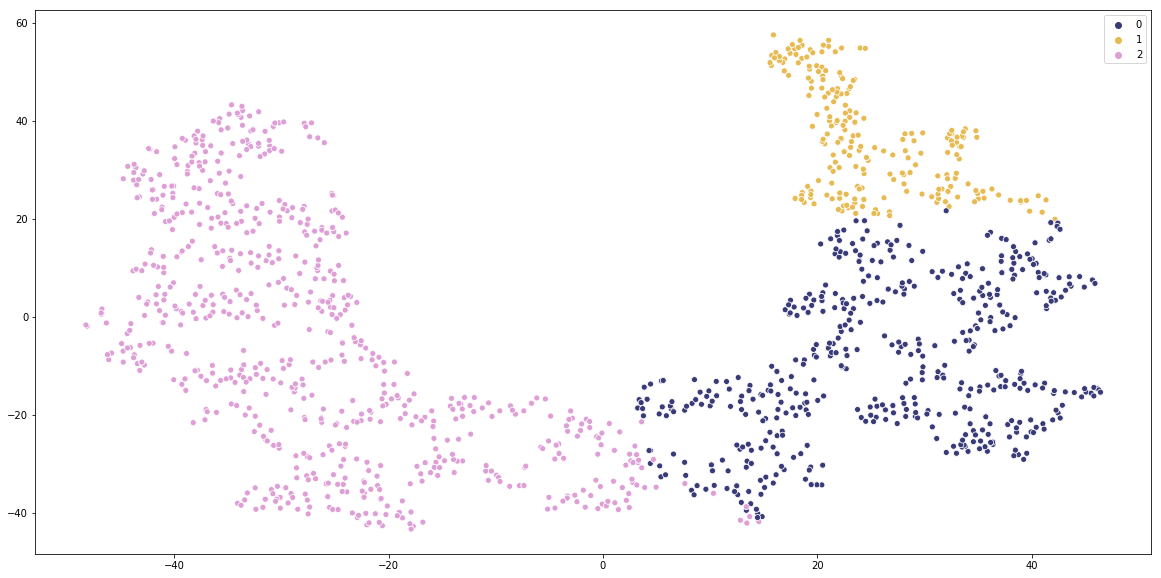

In [72]:
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1],hue=labels,palette='tab20b')

# PCA

In [10]:
from sklearn.preprocessing import StandardScaler

In [35]:
X=df[cols].values
x = StandardScaler().fit_transform(X)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
kmeans=KMeans(n_clusters=2).fit(principalComponents)
labels=kmeans.predict(principalComponents)

In [28]:
np.var(x,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
pca.explained_variance_

array([3.99753701, 2.96299348])

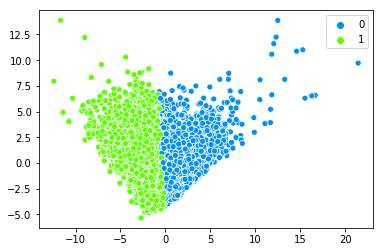

In [42]:
import seaborn as sns
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],hue=labels,palette='gist_rainbow_r')

# preparar tsv

In [81]:
with open('winequality-red.txt', 'r') as file:
    data = file.read()
data

'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\n8.9,0.62,0.18,3.8,0.1760

In [82]:
with open ("winequality-red.txt", "r") as myfile:
    data=myfile.readlines()

In [96]:
file1 = open("myfile.txt","a")


for i,row in enumerate(data):

    file1.write(row.replace(',','\t'))
fil

In [97]:
file1.close()

In [98]:
myfile.close()

In [76]:
data.replace(',','\t')

'fixed acidity\tvolatile acidity\tcitric acid\tresidual sugar\tchlorides\tfree sulfur dioxide\ttotal sulfur dioxide\tdensity\tpH\tsulphates\talcohol\tquality7.4\t0.7\t0.0\t1.9\t0.076\t11.0\t34.0\t0.9978\t3.51\t0.56\t9.4\t57.8\t0.88\t0.0\t2.6\t0.098\t25.0\t67.0\t0.9968\t3.2\t0.68\t9.8\t57.8\t0.76\t0.04\t2.3\t0.092\t15.0\t54.0\t0.997\t3.26\t0.65\t9.8\t511.2\t0.28\t0.56\t1.9\t0.075\t17.0\t60.0\t0.998\t3.16\t0.58\t9.8\t67.4\t0.7\t0.0\t1.9\t0.076\t11.0\t34.0\t0.9978\t3.51\t0.56\t9.4\t57.4\t0.66\t0.0\t1.8\t0.075\t13.0\t40.0\t0.9978\t3.51\t0.56\t9.4\t57.9\t0.6\t0.06\t1.6\t0.069\t15.0\t59.0\t0.9964\t3.3\t0.46\t9.4\t57.3\t0.65\t0.0\t1.2\t0.065\t15.0\t21.0\t0.9946\t3.39\t0.47\t10.0\t77.8\t0.58\t0.02\t2.0\t0.073\t9.0\t18.0\t0.9968\t3.36\t0.57\t9.5\t77.5\t0.5\t0.36\t6.1\t0.071\t17.0\t102.0\t0.9978\t3.35\t0.8\t10.5\t56.7\t0.58\t0.08\t1.8\t0.09699999999999999\t15.0\t65.0\t0.9959\t3.28\t0.54\t9.2\t57.5\t0.5\t0.36\t6.1\t0.071\t17.0\t102.0\t0.9978\t3.35\t0.8\t10.5\t55.6\t0.615\t0.0\t1.6\t0.089000000000

In [108]:
file1 = open("myfile4.txt","a")
file1.write(f'quality\n')

for i,row in df.iterrows():

    file1.write(str(row['quality'])+'\n')
file1.close()